# Remez Exchange Algorithm for Polynomial Approximation

In [71]:
from scipy.signal import remez, freqz
import seaborn as sns
import matplotlib.pyplot as plt
import mpmath
import remez_exch
import numpy as np
poly = np.polynomial.polynomial
import baryrat
import IPython

In [106]:
InteractiveShell = IPython.core.interactiveshell.InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Scipy Remez 

also consider (https://gist.github.com/dhermes/105da2a3c9861c90ea39)

In [39]:
def plot_response(fs, w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    ax.set_ylim(-40, 20)
    ax.set_xlim(0, 0.5*fs)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

<ipython-input-39-5fd21924cc83>:5: RuntimeWarning: divide by zero encountered in log10
  ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))


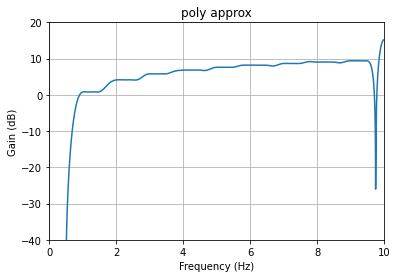

In [121]:
def f(x):
    return np.log(2*x+1)
bands = [x for x in range(0,20)]
desired = [f(x) for x in range(0,10)]
taps = remez(100,bands,desired,type='hilbert',Hz=40)
w, h = freqz(taps, [1], worN=2000)
plot_response(20, w, h, "poly approx")

## Barycentric 

https://link.springer.com/article/10.1007%2Fs11075-020-01042-0

[ 1  2  4  8 16]


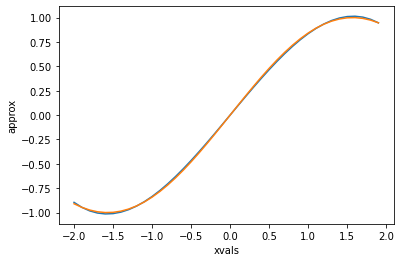

In [109]:
def get_p_from_coeffs(coeffs):
    n = len(coeffs)
    print(np.power(np.full(n,2),np.arange(0,n,1)))
    return lambda x: np.real(np.sum(coeffs * np.power(np.full(n,x),np.arange(0,n,1))))

def f(x): return np.sin(x)

p = baryrat.brasil(f, [-2,2], 4, poly=True)
xvals = np.arange(-2,2,0.1)
coeffs = poly.polyfromroots(p.zeros())
p_from_coeffs = get_p_from_coeffs(coeffs)

sns.lineplot(x = "xvals", y = "approx",
    data = {
        "xvals": xvals,
        "approx": np.array([p(x) for x in xvals])
    });
sns.lineplot(x = "xvals", y = "f",
    data = {
        "xvals": xvals,
        "f": np.array([f(x) for x in xvals])
    });

# sns.lineplot(x = "xvals", y = "p",
#     data = {
#         "xvals": xvals,
#         "p": np.array([p_from_coeffs(x) for x in xvals])
#     });

[            1             2             4             8            16
            32            64           128           256           512
          1024          2048          4096          8192         16384
         32768         65536        131072        262144        524288
       1048576       2097152       4194304       8388608      16777216
      33554432      67108864     134217728     268435456     536870912
    1073741824    2147483648    4294967296    8589934592   17179869184
   34359738368   68719476736  137438953472  274877906944  549755813888
 1099511627776]


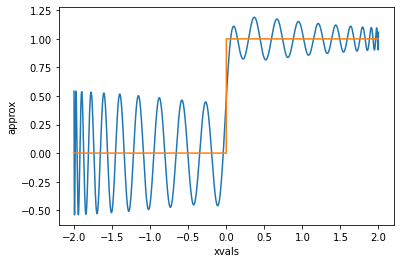

In [120]:

def f(x): 
    return np.heaviside(x,0)
   

p = baryrat.brasil(f, [-2,2], 40, poly=True)
xvals = np.arange(-2,2,0.0005)
coeffs = poly.polyfromroots(p.zeros())
p_from_coeffs = get_p_from_coeffs(coeffs)

sns.lineplot(x = "xvals", y = "approx",
    data = {
        "xvals": xvals,
        "approx": np.array([p(x) for x in xvals])
    });
sns.lineplot(x = "xvals", y = "f",
    data = {
        "xvals": xvals,
        "f": np.array([f(x) for x in xvals])
    });

# sns.lineplot(x = "xvals", y = "p",
#     data = {
#         "xvals": xvals,
#         "p": np.array([p_from_coeffs(x) for x in xvals])
#     });

https://eeweb.engineering.nyu.edu/iselesni/EL713/remez/remez.pdf
https://arxiv.org/pdf/2002.11649.pdf 